In [ ]:
!pip install pytorch_lightning
!pip install torch_lr_finder
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.optim as optim
import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

# import pytorch_lightning as pl
from tqdm import tqdm
from yolov3 import YOLOv3
from loss import YoloLoss
from utils import LearningRateFinder
# Create your config module or import it from the existing config.py file.
import config
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from main_yolov3_lightening import YOLOv3Lightning

In [ ]:
from google.colab import drive
import zipfile
drive.mount('/content/gdrive')
zip_file_path = '/content/gdrive/My Drive/archive (2).zip'
extract_path = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/gdrive


In [ ]:
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
from callbacks import AccuracyPlotCallback, MAPCallback

CHECKPOINT_PATH = "checkpoints/"
# Initialize the model
model = YOLOv3Lightning()

# Define the callbacks
callbacks = [ModelCheckpoint(dirpath=CHECKPOINT_PATH,verbose=True,),
                              AccuracyPlotCallback(every_n_epochs=5,train_every_n_epochs=1, test_every_n_epochs=5),
                              MAPCallback(every_n_epochs=5),
                              LearningRateMonitor()]

# Instantiate the Trainer with callbacks
trainer = pl.Trainer(
    precision=16,
    max_epochs=40,
    callbacks=callbacks
)

/usr/local/lib/python3.10/dist-packages/lightning/fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.003981071705534969
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.003981071705534969
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_260f8b4d-fddc-4020-b732-ad4539d53296.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint a

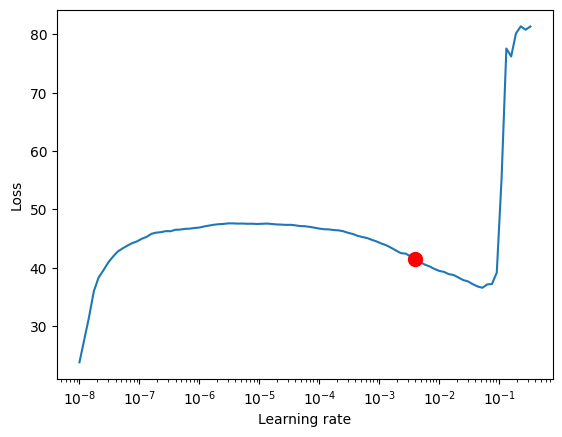

In [ ]:
# Create an instance of LearningRateFinder
lr_finder = LearningRateFinder(trainer, model)

# Find and set the learning rate
lr_finder.find_and_set_learning_rate()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name    | Type     | Params
-------------------------------------
0 | model   | YOLOv3   | 61.6 M
1 | loss_fn | YoloLoss | 0     
-------------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name    | Type     | Params
-------------

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 0
Loss: 19.49481773376465
Class Accuracy: 33.970745%
NoObject Accuracy: 97.411057%
Object Accuracy: 8.749696%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 1
Loss: 12.42752456665039
Class Accuracy: 36.829288%
NoObject Accuracy: 99.984688%
Object Accuracy: 0.690948%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 2
Loss: 11.210516929626465
Class Accuracy: 38.603386%
NoObject Accuracy: 96.151642%
Object Accuracy: 35.316353%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 3
Loss: 10.433501243591309
Class Accuracy: 31.453541%
NoObject Accuracy: 98.243439%
Object Accuracy: 28.728909%


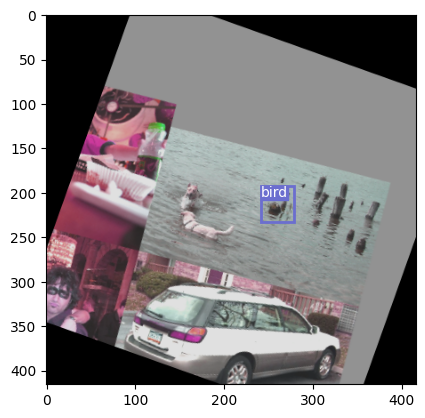

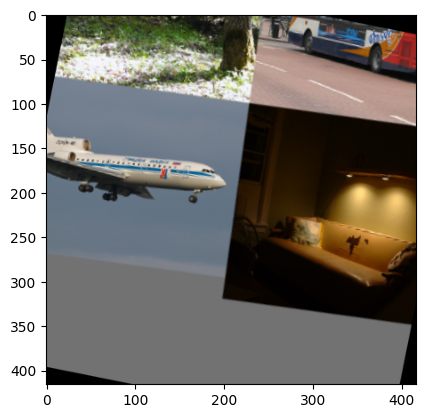

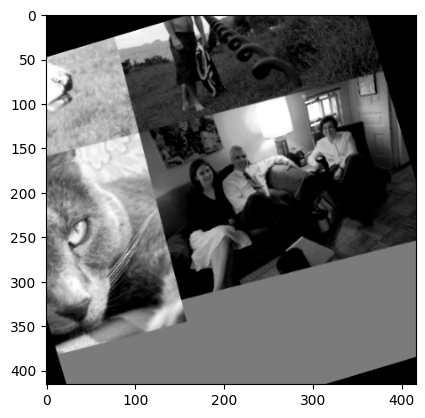

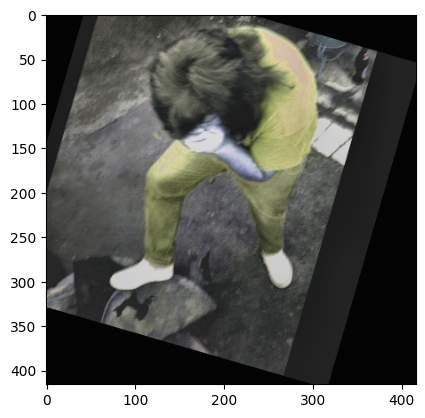

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 4
Loss: 13.182411193847656
Class Accuracy: 35.710907%
NoObject Accuracy: 99.029305%
Object Accuracy: 9.448177%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 42.125244%
No Object Accuracy: 99.394920%
Object Accuracy: 5.383763%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.00038854553713463247


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 5
Loss: 11.561393737792969
Class Accuracy: 39.287243%
NoObject Accuracy: 97.883629%
Object Accuracy: 32.023384%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 6
Loss: 10.444129943847656
Class Accuracy: 42.363075%
NoObject Accuracy: 97.379898%
Object Accuracy: 35.471760%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 7
Loss: 9.78909969329834
Class Accuracy: 43.603153%
NoObject Accuracy: 96.913589%
Object Accuracy: 45.213448%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 8
Loss: 9.333867073059082
Class Accuracy: 47.899506%
NoObject Accuracy: 97.272888%
Object Accuracy: 49.921036%


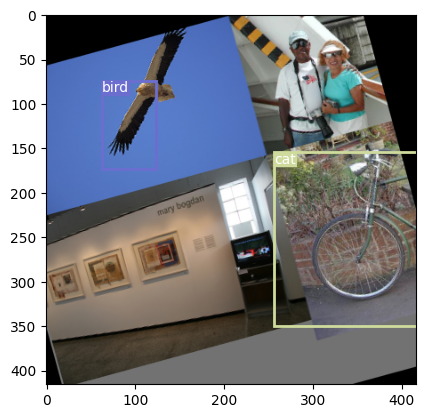

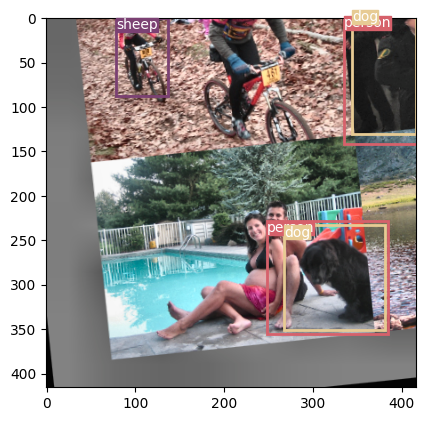

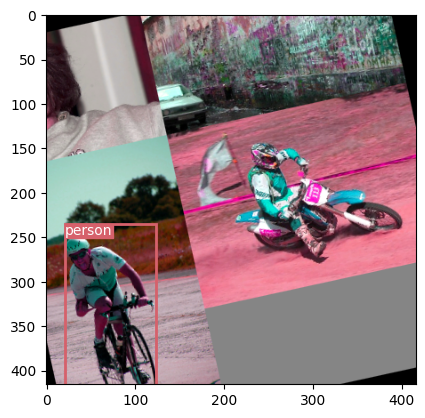

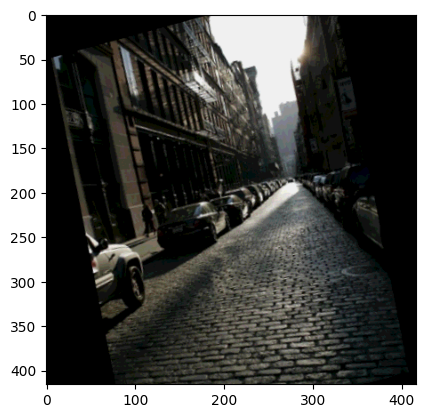

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 9
Loss: 8.942992210388184
Class Accuracy: 47.025429%
NoObject Accuracy: 97.400436%
Object Accuracy: 50.724117%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 58.035469%
No Object Accuracy: 98.380844%
Object Accuracy: 39.963978%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.06164685636758804


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 10
Loss: 8.608917236328125
Class Accuracy: 46.768078%
NoObject Accuracy: 97.359482%
Object Accuracy: 53.288704%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 11
Loss: 8.2920503616333
Class Accuracy: 51.620655%
NoObject Accuracy: 98.063110%
Object Accuracy: 49.816647%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 12
Loss: 8.05746078491211
Class Accuracy: 55.000317%
NoObject Accuracy: 97.189873%
Object Accuracy: 55.521202%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 13
Loss: 7.763381481170654
Class Accuracy: 56.475574%
NoObject Accuracy: 97.767342%
Object Accuracy: 55.174393%


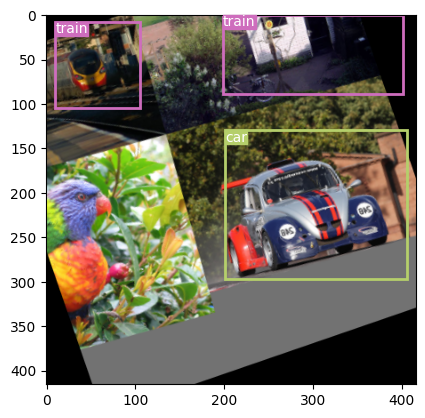

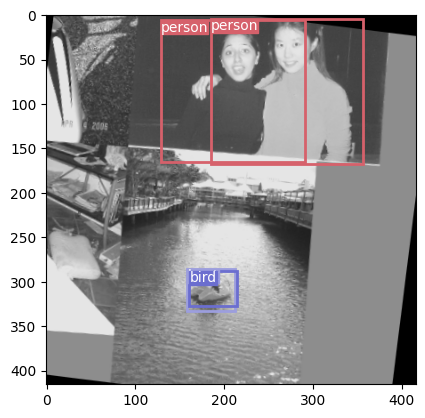

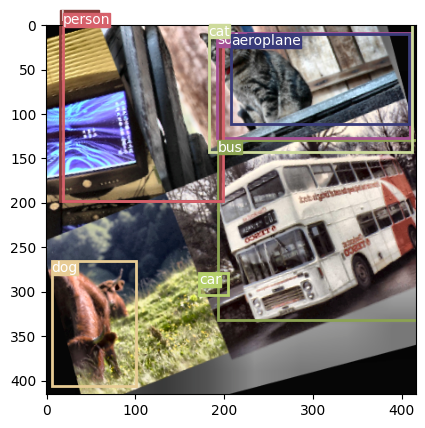

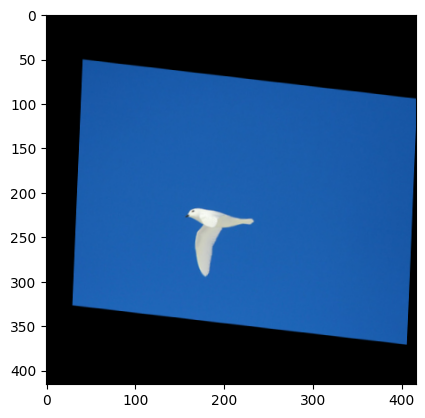

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 14
Loss: 7.538154125213623
Class Accuracy: 56.411667%
NoObject Accuracy: 97.817841%
Object Accuracy: 54.443096%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 66.040459%
No Object Accuracy: 98.659584%
Object Accuracy: 42.479912%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.10533151775598526


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 15
Loss: 7.313104152679443
Class Accuracy: 61.416912%
NoObject Accuracy: 97.857841%
Object Accuracy: 56.663090%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 16
Loss: 7.08879280090332
Class Accuracy: 57.411617%
NoObject Accuracy: 97.493134%
Object Accuracy: 63.282158%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 17
Loss: 6.863412857055664
Class Accuracy: 61.500423%
NoObject Accuracy: 97.585068%
Object Accuracy: 63.520073%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 18
Loss: 6.707099914550781
Class Accuracy: 64.935646%
NoObject Accuracy: 97.301384%
Object Accuracy: 66.930405%


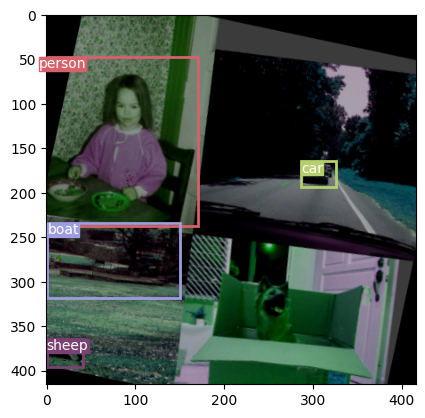

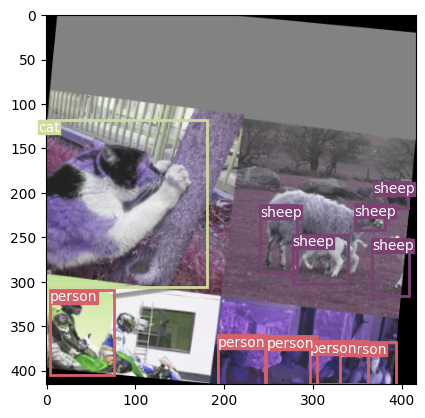

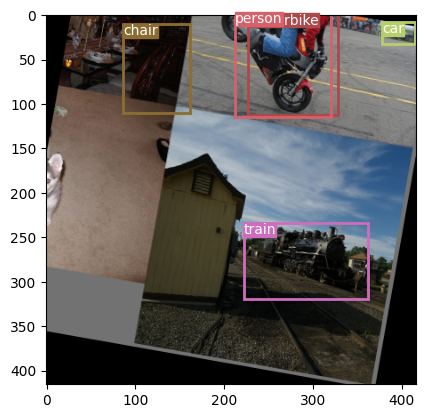

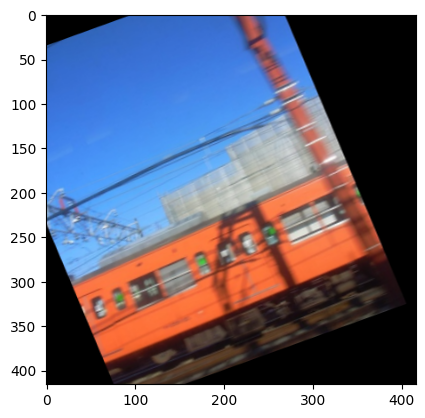

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 19
Loss: 6.5002617835998535
Class Accuracy: 62.066196%
NoObject Accuracy: 97.596428%
Object Accuracy: 63.477959%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 73.022995%
No Object Accuracy: 98.152725%
Object Accuracy: 58.614574%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.17913833260536194


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 20
Loss: 6.360651016235352
Class Accuracy: 66.657845%
NoObject Accuracy: 97.789642%
Object Accuracy: 64.264702%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 21
Loss: 6.212465286254883
Class Accuracy: 68.756004%
NoObject Accuracy: 97.635429%
Object Accuracy: 67.782745%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 22
Loss: 6.032721042633057
Class Accuracy: 68.837051%
NoObject Accuracy: 97.886864%
Object Accuracy: 65.842628%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 23
Loss: 5.865704536437988
Class Accuracy: 70.851395%
NoObject Accuracy: 97.721016%
Object Accuracy: 67.797615%


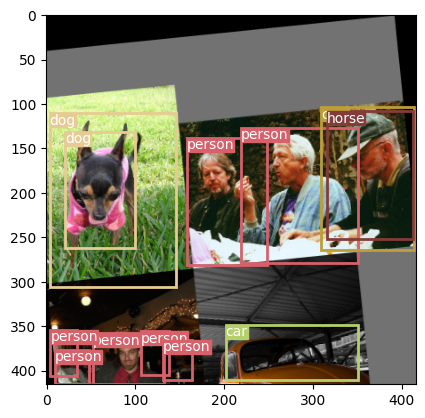

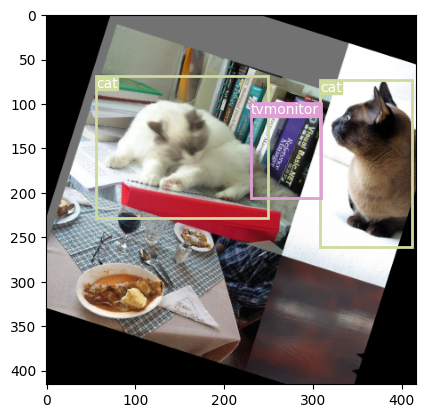

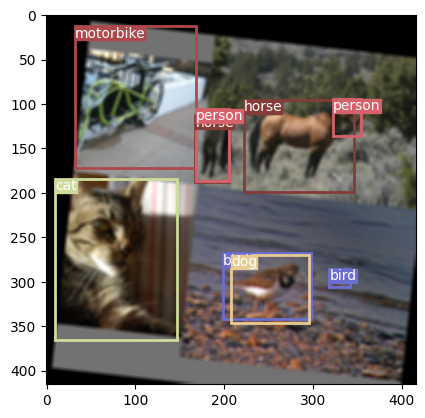

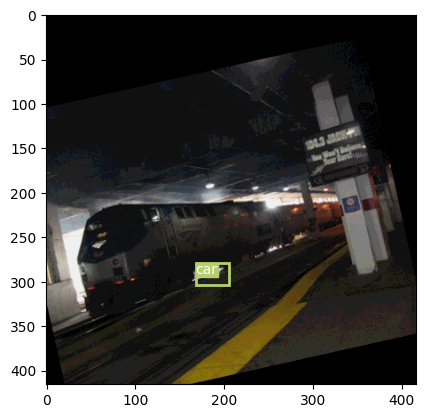

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 24
Loss: 5.77097225189209
Class Accuracy: 70.902138%
NoObject Accuracy: 97.661629%
Object Accuracy: 70.420074%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 80.304794%
No Object Accuracy: 98.559212%
Object Accuracy: 64.053757%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.2439880073070526


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 25
Loss: 5.630573749542236
Class Accuracy: 72.216118%
NoObject Accuracy: 97.615280%
Object Accuracy: 71.060028%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 26
Loss: 5.477327823638916
Class Accuracy: 71.193787%
NoObject Accuracy: 97.991142%
Object Accuracy: 68.257866%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 27
Loss: 5.367245197296143
Class Accuracy: 74.617043%
NoObject Accuracy: 97.901489%
Object Accuracy: 69.967583%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 28
Loss: 5.261119842529297
Class Accuracy: 74.354378%
NoObject Accuracy: 97.543625%
Object Accuracy: 73.369926%


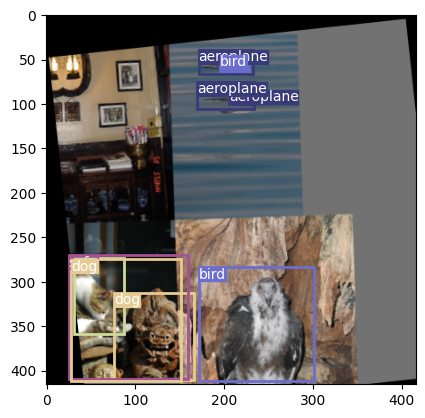

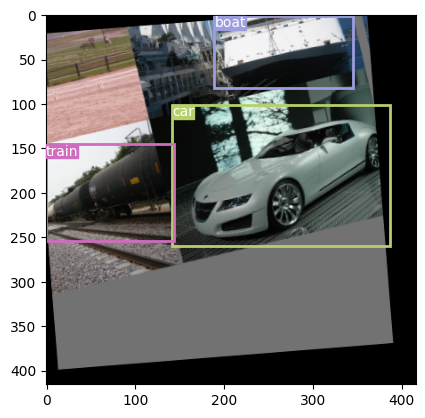

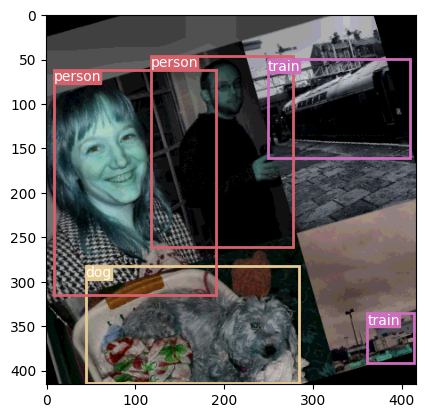

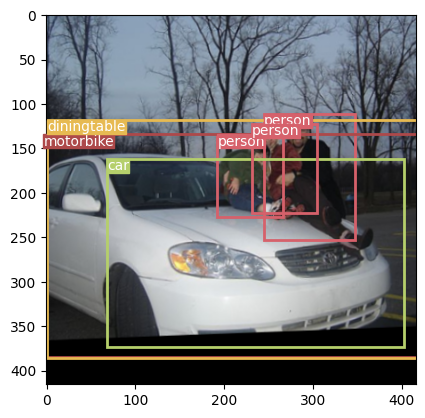

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 29
Loss: 5.1200175285339355
Class Accuracy: 76.421646%
NoObject Accuracy: 97.773682%
Object Accuracy: 72.400978%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 83.748962%
No Object Accuracy: 98.634834%
Object Accuracy: 67.198669%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.3433975279331207


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 30
Loss: 5.020963191986084
Class Accuracy: 77.039024%
NoObject Accuracy: 97.807350%
Object Accuracy: 73.041603%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 31
Loss: 4.890392303466797
Class Accuracy: 77.145073%
NoObject Accuracy: 97.833588%
Object Accuracy: 72.890656%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 32
Loss: 4.79513692855835
Class Accuracy: 77.910027%
NoObject Accuracy: 97.834068%
Object Accuracy: 74.504196%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 33
Loss: 4.664412975311279
Class Accuracy: 80.122604%
NoObject Accuracy: 97.968903%
Object Accuracy: 74.358109%


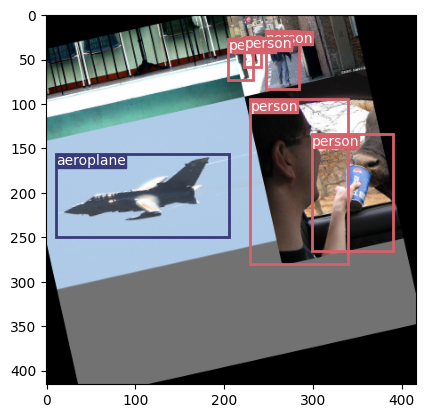

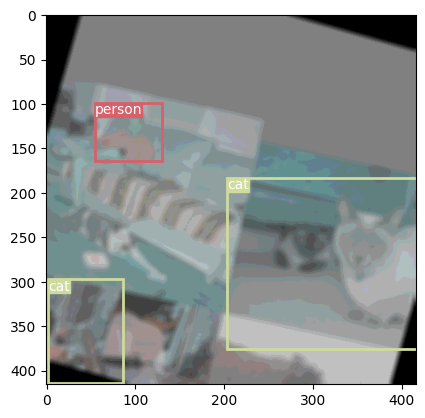

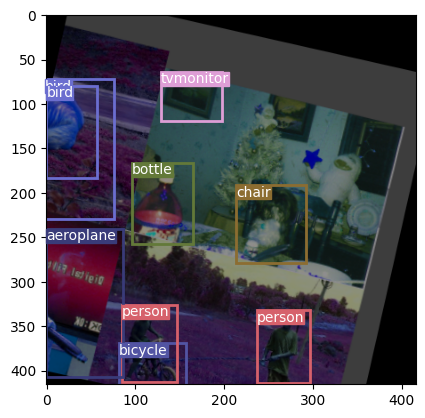

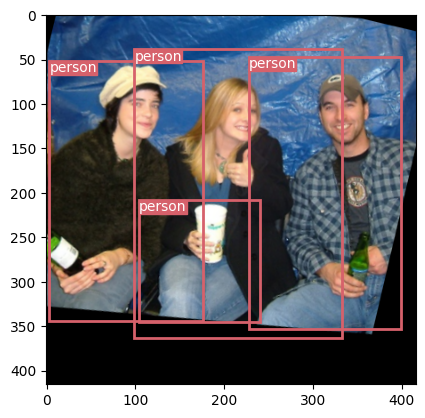

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 34
Loss: 4.541550159454346
Class Accuracy: 80.508759%
NoObject Accuracy: 97.914307%
Object Accuracy: 75.033257%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 85.807709%
No Object Accuracy: 98.733398%
Object Accuracy: 69.454140%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.4030178189277649


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 35
Loss: 4.427643299102783
Class Accuracy: 81.567268%
NoObject Accuracy: 97.968330%
Object Accuracy: 75.312454%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 36
Loss: 4.328610897064209
Class Accuracy: 82.374176%
NoObject Accuracy: 98.055023%
Object Accuracy: 75.051537%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 37
Loss: 4.233778953552246
Class Accuracy: 83.022781%
NoObject Accuracy: 98.067123%
Object Accuracy: 75.267967%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 38
Loss: 4.161015510559082
Class Accuracy: 83.434120%
NoObject Accuracy: 98.060966%
Object Accuracy: 75.967041%


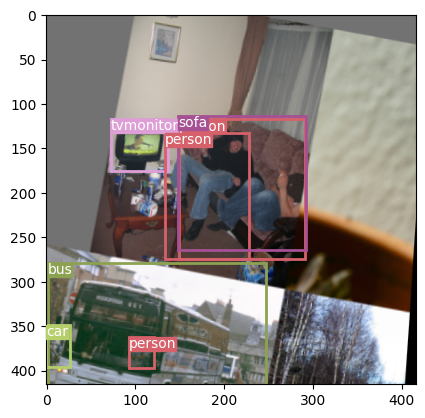

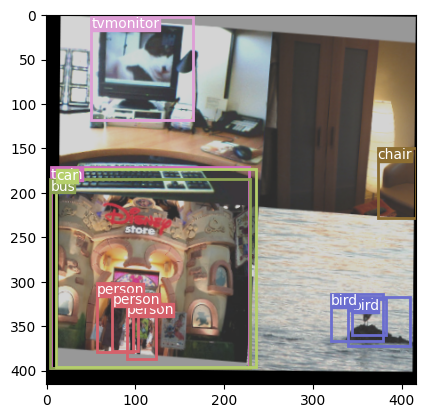

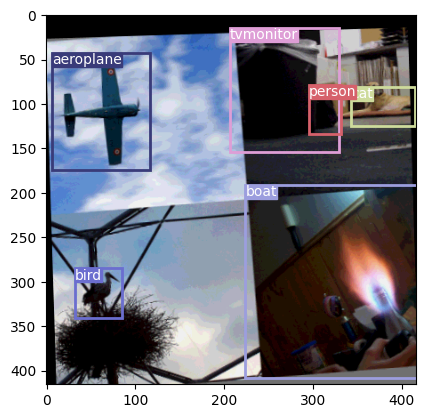

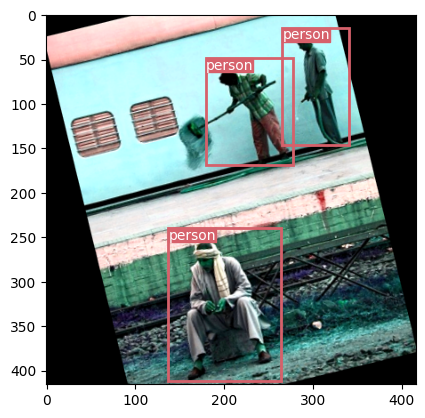

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 39
Loss: 4.093114852905273
Class Accuracy: 84.100090%
NoObject Accuracy: 98.076469%
Object Accuracy: 75.833023%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 88.079796%
No Object Accuracy: 98.869911%
Object Accuracy: 70.138542%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP Value:  0.45511260628700256


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


In [ ]:
trainer.fit(model)

In [ ]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/checkpoints/epoch=39-step=41400.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/checkpoints/epoch=39-step=41400.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │    3.8737339973449707     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 3.8737339973449707}]

In [ ]:
# # # Save the model
torch.save(model.state_dict(), "yolov3_model_with_75_mosaic.pth")

In [ ]:
import shutil
drive_path = '/content/gdrive/My Drive/yolov3_model_with_75_mosaic.pth'
local_path = 'yolov3_model_with_75_mosaic.pth'  # The path where you saved the model within Colab

shutil.copyfile(local_path, drive_path)

'/content/gdrive/My Drive/yolov3_model_with_75_mosaic.pth'